In [31]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('student-mat.csv')

## general knowledge
data.columns
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [61]:
def addLabel(x, when):
    if when == 'daily':
        if x['Dalc'] < 3:
            return 'low'
        if x['Dalc'] == 3:
            return 'medium'
        if x['Dalc'] > 3:
            return 'High'
    else:
        if x['Walc'] < 3:
            return 'low'
        if x['Walc'] == 3:
            return 'medium'
        if x['Walc'] > 3:
            return 'High'

data['day_consumption'] = data.apply(lambda x: addLabel(x, 'daily'), axis=1)
data['week_consumption'] = data.apply(lambda x: addLabel(x, 'weekly'), axis=1)

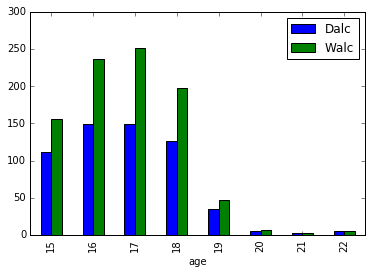

In [60]:
# age vs alchol consumption

df = data[['age', 'Dalc', 'Walc']]
df.groupby(['age']).sum().plot(kind='bar')

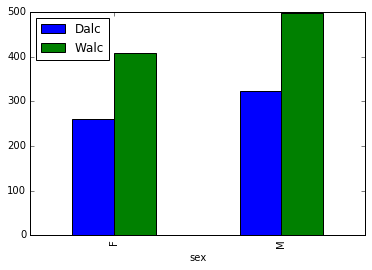

In [62]:
## sex vs alchol consumption

df = data[['sex', 'Dalc', 'Walc']]
df.groupby('sex').sum().plot(kind='bar')

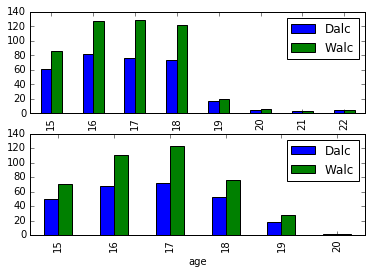

In [63]:
## sex vs alchol divide across age

df = data[['sex', 'age', 'Dalc', 'Walc']]
df = df.groupby(['age', 'sex']).sum().reset_index()
males = df[df.sex == 'M']
males = males[['age', 'Dalc', 'Walc']]
males = males.set_index('age')
females = df[df.sex == 'F']
females = females[['age', 'Dalc', 'Walc']]
females = females.set_index('age')

fig, ax = plt.subplots(2)

males.plot(kind='bar', ax=ax[0]) ## corresponding to male students
females.plot(kind='bar', ax=ax[1]) ## corresponding to female students


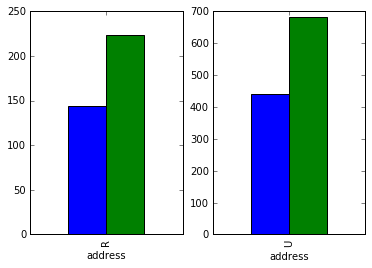

In [140]:
# consumption in differnt address

fig, ax = plt.subplots(1, 2)

df = data[['address', 'Dalc', 'Walc']]
df = df[df['address'] == 'R']
df.groupby(['address']).sum().plot(kind='bar', ax=ax[0], legend=False)

df = data[['address', 'Dalc', 'Walc']]
df = df[df['address'] == 'U']
df.groupby(['address']).sum().plot(kind='bar', ax=ax[1], legend=False)

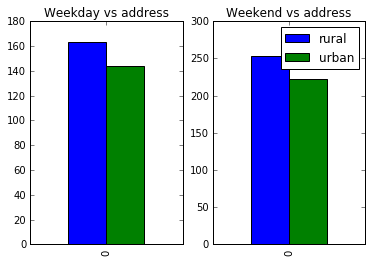

In [149]:
# ratio of consumption in differnt address

ratios = pd.DataFrame()
fig, ax = plt.subplots(1, 2)

# % consumption in week day for rural
df = data[['address', 'Dalc']]
df = df[df['address'] == 'R']
rows = df.shape[0]
df = df.groupby(['address']).sum()
df['total'] = rows
df['ratio'] = df['Dalc'] / df['total'] * 100

ratios['rural'] = df['ratio'].values

# % consumption in week day for urban
df = data[['address', 'Dalc',]]
df = df[df['address'] == 'U']
rows = df.shape[0]
df = df.groupby(['address']).sum()
df['total'] = rows
df['ratio'] = df['Dalc'] / df['total'] * 100

ratios['urban'] = df['ratio'].values
ratios.plot(kind='bar', ax=ax[0], legend=False, title='Weekday vs address')

# % consumption in weekend for rural
df = data[['address', 'Walc']]
df = df[df['address'] == 'R']
rows = df.shape[0]
df = df.groupby(['address']).sum()
df['total'] = rows
df['ratio'] = df['Walc'] / df['total'] * 100

ratios['rural'] = df['ratio'].values

# % consumption in weekend for urban
df = data[['address', 'Walc',]]
df = df[df['address'] == 'U']
rows = df.shape[0]
df = df.groupby(['address']).sum()
df['total'] = rows
df['ratio'] = df['Walc'] / df['total'] * 100

ratios['urban'] = df['ratio'].values
ratios.plot(kind='bar', ax=ax[1], title='Weekend vs address')

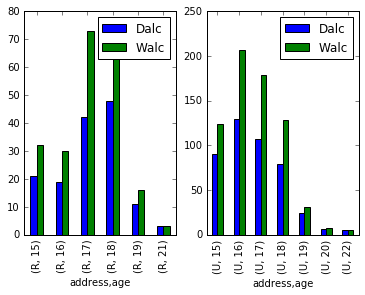

In [76]:
# address vs consumption divide across ages

fig, ax = plt.subplots(1, 2)
df = data[['address', 'age', 'Dalc', 'Walc']]
df = df[df['address'] == 'R']
df.groupby(['address', 'age']).sum().plot(kind='bar', ax=ax[0])

df = data[['address', 'age', 'Dalc', 'Walc']]
df = df[df['address'] == 'U']
df.groupby(['address', 'age']).sum().plot(kind='bar', ax=ax[1])


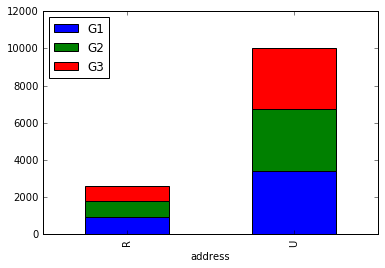

In [79]:
# address vs grades

df = data[['G1', 'G2', 'G3', 'address']]
df.groupby(['address']).sum().plot(kind='bar', stacked=True)

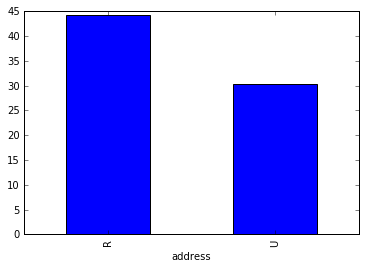

In [98]:
# failure ratio vs address

df = data[['address', 'failures']]
df = df.groupby(['address']).sum()
df['address'] = data.groupby(['address']).size()
df['failure_ratio'] = df['failures'] / df['address'] * 100

df['failure_ratio'].plot(kind='bar')

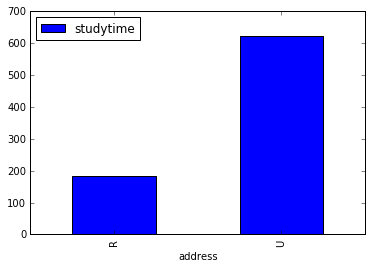

In [132]:
# study time vs address

df = data[['studytime', 'address']]
df.groupby(['address']).sum().plot(kind='bar')

In [159]:
# absences vs address

df = data[['absences', 'address']]
df.groupby(['address']).sum()

,absences
address,
R,539
U,1716


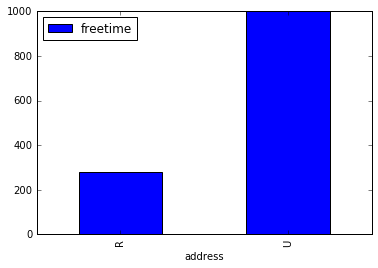

In [134]:
# free time vs address

df = data[['freetime', 'address']]
df.groupby(['address']).sum().plot(kind='bar')

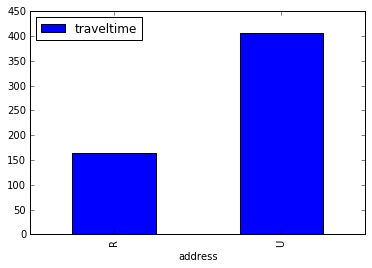

In [158]:
# traveltime vs address

df = data[['traveltime', 'address']]
df.groupby(['address']).sum().plot(kind='bar')

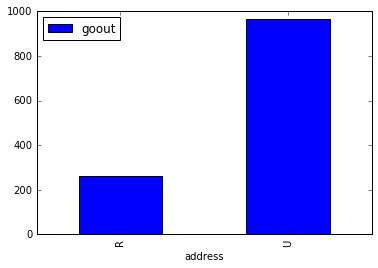

In [135]:
# goout vs address

df = data[['goout', 'address']]
df.groupby(['address']).sum().plot(kind='bar')

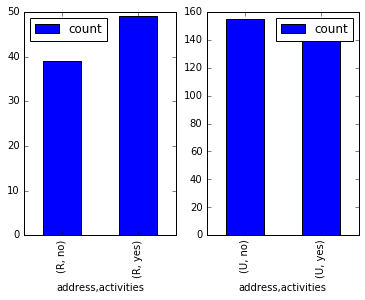

In [154]:
# activities vs address

fig, ax = plt.subplots(1, 2)

df = data[['activities', 'address']]
df['count'] = 1
df = df[df['address'] == 'R']
df.groupby(['address', 'activities']).sum().plot(kind='bar', ax=ax[0])

df = data[['activities', 'address']]
df['count'] = 1
df = df[df['address'] == 'U']
df.groupby(['address', 'activities']).sum().plot(kind='bar', ax=ax[1])